In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [75]:
df=pd.read_csv("cleaned_amazon_products.csv")
print(df.shape)

(334961, 10)


In [76]:
df.head(2)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount%
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255,32999.0,58990.0,44.06001
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490.0,75990.0,38.82090


In [77]:
numeric_cols=['ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'discount%']

In [78]:
main_cat=df.main_category.unique().tolist()
print("Total main categories:",len(main_cat))
print("Ex:",main_cat[:5])

Total main categories: 20
Ex: ['appliances', 'car & motorbike', 'tv, audio & cameras', 'sports & fitness', 'grocery & gourmet foods']


In [79]:
sub_cat=df.sub_category.unique().tolist()
print("Total sub categories:",len(sub_cat))
print("Ex:",sub_cat[:10])

Total sub categories: 112
Ex: ['Air Conditioners', 'All Appliances', 'All Car & Motorbike Products', 'All Electronics', 'All Exercise & Fitness', 'All Grocery & Gourmet Foods', 'All Home & Kitchen', 'All Pet Supplies', 'All Sports, Fitness & Outdoors', 'Amazon Fashion']


In [80]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# define feature columns for clustering
clustering_cols=['ratings', 'discount%']

# Normalize the data using StandardScaler to ensure all features have the same scale
scaler = StandardScaler()
df_scaled = pd.DataFrame( scaler.fit_transform(df[clustering_cols]) ,columns=clustering_cols)

# Number of clusters you want to create (you can adjust this according to your requirements)
num_clusters = 4

# Create KMeans object
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
predicted_clusters = kmeans.fit_predict(df_scaled)

#Redifining clusters to make recommendations better
# cluster 0 -> 4 means worst to best products
clusters_redefined={1:0,
                  3:1,
                  2:2,
                  0:3}

df['cluster'] = np.array( list(map(clusters_redefined.get,predicted_clusters)) )

# Check the cluster centers (representative points of each cluster)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=clustering_cols)

cluster_centers['count']=df['cluster'].value_counts()

print(cluster_centers)


    ratings  discount%   count
0  4.485294  56.585594   19939
1  1.783437  51.289245   97567
2  3.584330  66.653573  133485
3  3.968599  24.586076   83970


In [81]:
df.groupby('cluster').mean(numeric_only=True)

,ratings,no_of_ratings,discount_price,actual_price,discount%
cluster,,,,,
0,1.780942,5.379909,1486.186451,2833.338831,51.259276
1,3.969458,1053.709297,3391.620736,4469.906406,24.567756
2,3.583123,525.364708,782.921637,2416.451708,66.625369
3,4.484641,1345.363701,1478.506075,3259.377475,56.622951


In [82]:
spam_df1=df[(df.cluster==0) & (df.ratings<6) & (df['discount%']>70)][numeric_cols]
spam_df1

,ratings,no_of_ratings,discount_price,actual_price,discount%
946,1.6,58,149.0,999.0,85.08509
1654,2.0,1,101.0,999.0,89.88989
1667,2.0,1,101.0,999.0,89.88989
1725,1.0,1,99.0,999.0,90.09009
2334,2.5,5,139.0,500.0,72.20000
...,...,...,...,...,...
334311,1.0,1,299.0,2499.0,88.03522
334499,1.0,1,999.0,3499.0,71.44899
334639,1.0,1,531.0,1998.0,73.42342
334844,1.9,2,217.0,2480.0,91.25000


In [83]:
spam_df2=df[(df.cluster==2) & (df.ratings<3) & (df['discount%']>75)][numeric_cols]
spam_df2

,ratings,no_of_ratings,discount_price,actual_price,discount%
647,2.6,94,169.0,999.0,83.083084
1991,2.9,335,499.0,2199.0,77.307870
2521,2.7,16,149.0,999.0,85.085090
2815,2.5,9,199.0,999.0,80.080080
3371,2.7,7,110.0,499.0,77.955920
...,...,...,...,...,...
333477,2.9,4,299.0,3000.0,90.033330
333619,2.9,19,464.0,1999.0,76.788400
333996,2.7,11,219.0,999.0,78.078080
334186,2.6,40,299.0,1519.0,80.315994


In [84]:
spam_df=pd.concat([spam_df1,spam_df2])
spam_df

,ratings,no_of_ratings,discount_price,actual_price,discount%
946,1.6,58,149.0,999.0,85.085090
1654,2.0,1,101.0,999.0,89.889890
1667,2.0,1,101.0,999.0,89.889890
1725,1.0,1,99.0,999.0,90.090090
2334,2.5,5,139.0,500.0,72.200000
...,...,...,...,...,...
333477,2.9,4,299.0,3000.0,90.033330
333619,2.9,19,464.0,1999.0,76.788400
333996,2.7,11,219.0,999.0,78.078080
334186,2.6,40,299.0,1519.0,80.315994


/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


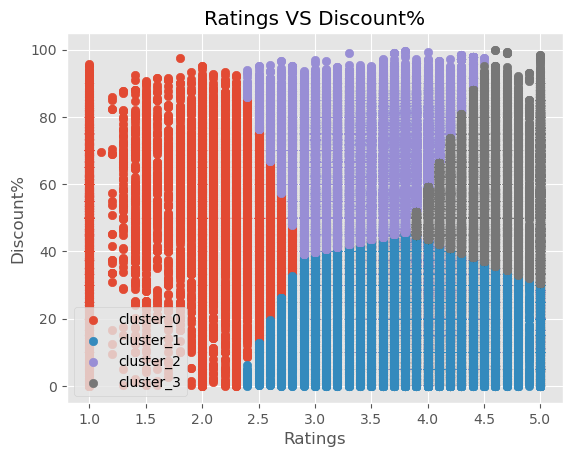

In [88]:
#plt.figure(figsize=(10,7))
for i in range(num_clusters):
    plt.scatter(df[df.cluster==i]['ratings'],df[df.cluster==i]['discount%'],label=f"cluster_{i}")

#plt.scatter(spam_df['ratings'],spam_df['discount%'],label="Fradulent section")
plt.title("Ratings VS Discount%")
plt.xlabel('Ratings')
plt.ylabel('Discount%')
plt.legend()


/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


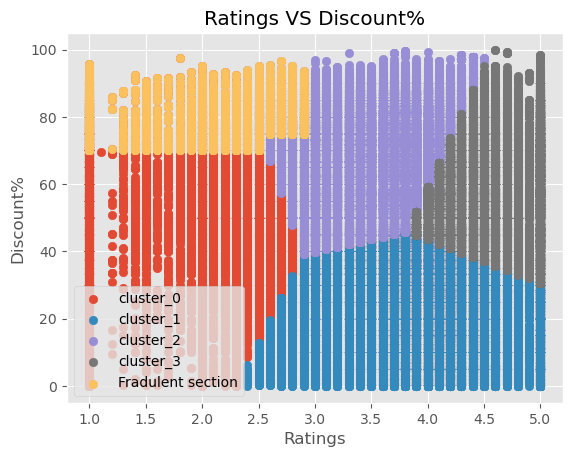

In [54]:
#plt.figure(figsize=(10,7))
for i in range(4):
    plt.scatter(df[df.cluster==i]['ratings'],df[df.cluster==i]['discount%'],label=f"cluster_{i}")

plt.scatter(spam_df['ratings'],spam_df['discount%'],label="Fradulent section")
plt.title("Ratings VS Discount%")
plt.xlabel('Ratings')
plt.ylabel('Discount%')
plt.legend()


In [14]:
import pickle

with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)
with open("standard_scaler_model.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [15]:
import pickle

def load_clustering_model(kmeans_model="kmeans_model.pkl"):
    with open(kmeans_model, "rb") as f:
        kmeans_model = pickle.load(f)
    
    return kmeans_model

def load_scaling_model(standard_scaler_model="standard_scaler_model.pkl"):
    with open(standard_scaler_model, "rb") as f:
        standard_scaler_model = pickle.load(f)
        
    return standard_scaler_model

In [191]:
def predict_cluster(X,kmeans_model,standard_scaler_model):
    
    clustering_cols=['ratings', 'discount%']
    
    #X can be pandas dataframe or numpy array , converting 1d to 2d and if X is numpy then numpy -> pandas
    if X.ndim == 1:
        if isinstance(X,pd.core.series.Series):
            X=pd.DataFrame(X.values.reshape(1,-1),columns=clustering_cols)
            
        elif isinstance(X,np.ndarray):
            X=pd.DataFrame(X.reshape(1,-1),columns=clustering_cols)
            
    elif X.ndim==2 and isinstance(X,np.ndarray):
        X=pd.DataFrame(X,columns=clustering_cols)
        
    X_scaled=pd.DataFrame(standard_scaler_model.transform(X),columns=clustering_cols)
    
    kmeans_result=kmeans_model.predict(X_scaled)
    
    X['cluster']=kmeans_result
    
    return kmeans_result,X

In [174]:
def predict_fraud(X):
     return ((X.cluster==1) & (X.ratings<6) & (X['discount%']>70)) | ((X.cluster==2) & (X.ratings<3) & (X['discount%']>75))

In [16]:
kmeans_model=load_clustering_model()
standard_scaler_model=load_scaling_model()

In [ ]:
cluster_centroids=pd.DataFrame(standard_scaler_model.inverse_transform(kmeans_model.cluster_centers_), columns=kmeans_model.feature_names_in_)
cluster_centroids

In [184]:
ratings=2.6
discount_percent=83
clusters,x=predict_cluster(np.array([ratings,discount_percent]),kmeans_model,standard_scaler_model)

In [190]:
predict_fraud(x)

0    True
dtype: bool